# Model Training for Disease Risk Prediction

## **Sufyan Ahmad**

### **FAIR Dataset with DBRepo**

In this project, we aim to develop a machine learning model to predict disease risk based on a set of clinical and lifestyle features. The model is trained using a dataset that includes variables such as age, blood pressure, cholesterol levels, BMI, glucose levels, smoking habits, and exercise hours. The goal is to accurately classify individuals into high-risk and low-risk categories for disease, based on these factors. This process involves data preprocessing, feature selection, model training, and evaluation to ensure robust performance.

### **1. Installing the required packages**

In [1]:
# Install necessary packages
%pip install dbrepo==1.7.3
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **2. Importing libraries**

In [ ]:
# Import required libraries
import pandas as pd
import io
from getpass import getpass
from dbrepo.RestClient import RestClient

### **3. Using Credentials for Data Access with API's**

In [4]:
username = 'Sufiyan' 
password = getpass("Enter your TU Wien password: ")  # Securely prompt for password

### **4. Initializing the DBRepo Client**

In [5]:
# Initialize client
client = RestClient('https://test.dbrepo.tuwien.ac.at', 
                      username=username, 
                      password=password)

print(client.get_users())   # List all users just to check if the connection is successful


[UserBrief(id='2955d238-a9b5-103f-8cb9-a35058fbb25a', username='urdeaa', name='Ana-Maria Urdea', orcid='https://orcid.org/0009-0004-0888-9833', qualified_name='Ana-Maria Urdea — @urdeaa', given_name='Ana-Maria', family_name='Urdea'), UserBrief(id='327787b6-abe6-103f-8cbd-a35058fbb25a', username='khasrur', name='khasrur Rahman', orcid=None, qualified_name='khasrur Rahman — @khasrur', given_name='khasrur', family_name='Rahman'), UserBrief(id='49cf63a0-aa3a-103f-8cba-a35058fbb25a', username='igehak', name='Valentin Futterer', orcid='https://orcid.org/0009-0002-5874-5075', qualified_name='Valentin Futterer — @igehak', given_name='Valentin', family_name='Futterer'), UserBrief(id='770c0174-aa8b-103f-8cbb-a35058fbb25a', username='sufiyan', name='Sufiyan Ahmed', orcid=None, qualified_name='Sufiyan Ahmed — @sufiyan', given_name='Sufiyan', family_name='Ahmed'), UserBrief(id='7e77d6a8-a7d5-103f-8cb5-a35058fbb25a', username='mweise', name='Martin Weise', orcid=None, qualified_name='Martin Weise — 

### **5. Initializing the PID's and Loading Data**

In [6]:
train_pid = '43758c76-17f2-4529-bb38-c0ad6ae47f30'  # training dataset PID
val_pid = '19a1a84d-7519-4e8e-be55-971419ac21de'  # validation dataset PID
test_pid = '734f2cda-517b-4968-82ca-b6c0a98e79d6'  # test dataset PID

In [7]:
# Load data using PIDs
print("Loading training data...")
train_df = client.get_identifier_data(train_pid)  # already a DataFrame
print(f"Training data loaded successfully with {train_df.shape[0]} rows and {train_df.shape[1]} columns")

Loading training data...
Training data loaded successfully with 600 rows and 9 columns


In [8]:
# Display first few rows of the training data just for testing purposes
print("\nPreview of training data:")
train_df.head()


Preview of training data:


,patient_id,age,blood_pressure,cholesterol,bmi,glucose,smoker,exercise_hours,disease_risk
0,1,56,140,197,28.500000000000000000,87,true,3.600000000000000000,false
1,2,69,109,204,25.300000000000000000,83,false,2.900000000000000000,true
2,3,46,137,217,28.600000000000000000,84,true,2.000000000000000000,true
3,4,32,114,215,20.500000000000000000,100,true,1.500000000000000000,true
4,5,60,109,127,32.100000000000000000,70,false,7.200000000000000000,true


In [9]:
# validation data
print("Loading validation data...")
val_data = client.get_identifier_data(val_pid)
print(f"Validation data loaded successfully with {val_data.shape[0]} rows and {val_data.shape[1]} columns")

# test data
print("Loading test data...")
test_data = client.get_identifier_data(test_pid)
print(f"Test data loaded successfully with {test_data.shape[0]} rows and {test_data.shape[1]} columns")


Loading validation data...
Validation data loaded successfully with 200 rows and 9 columns
Loading test data...
Test data loaded successfully with 200 rows and 9 columns


In [11]:
# Exploratory Data Analysis
print("\nData summary statistics:")
train_df.describe()


Data summary statistics:


,patient_id,age,blood_pressure,cholesterol,bmi,glucose,smoker,exercise_hours,disease_risk
count,600,600,600,600,600,600,600,600,600
unique,600,62,78,138,187,80,2,101,2
top,1,77,110,184,15.000000000000000000,70,false,0.200000000000000000,false
freq,1,20,22,13,18,37,427,25,407


### 5.1 Checking if there's any Missing Values

In [12]:
# Check for missing values
print("\nMissing values per column:")
train_df.isnull().sum()


Missing values per column:


patient_id        0
age               0
blood_pressure    0
cholesterol       0
bmi               0
glucose           0
smoker            0
exercise_hours    0
disease_risk      0
dtype: int64

## **6. Model Training and Saving**

#### 6.1 Data Loading and Preprocessing

In [39]:
import pandas as pd

# Load data (ensure you load it correctly)
train_df = pd.DataFrame(client.get_identifier_data(train_pid))
val_df = pd.DataFrame(client.get_identifier_data(val_pid))
test_df = pd.DataFrame(client.get_identifier_data(test_pid))

# Convert 'true'/'false' to 1/0 for smoker and disease_risk
train_df['smoker'] = train_df['smoker'].map({'true': 1, 'false': 0})
val_df['smoker'] = val_df['smoker'].map({'true': 1, 'false': 0})
test_df['smoker'] = test_df['smoker'].map({'true': 1, 'false': 0})

train_df['disease_risk'] = train_df['disease_risk'].map({'true': 1, 'false': 0})
val_df['disease_risk'] = val_df['disease_risk'].map({'true': 1, 'false': 0})
test_df['disease_risk'] = test_df['disease_risk'].map({'true': 1, 'false': 0})

# Check data after transformation
print(train_df.head())
print(val_df.head())
print(test_df.head())


  patient_id age blood_pressure cholesterol                    bmi glucose  \
0          1  56            140         197  28.500000000000000000      87   
1          2  69            109         204  25.300000000000000000      83   
2          3  46            137         217  28.600000000000000000      84   
3          4  32            114         215  20.500000000000000000     100   
4          5  60            109         127  32.100000000000000000      70   

   smoker        exercise_hours  disease_risk  
0       1  3.600000000000000000             0  
1       0  2.900000000000000000             1  
2       1  2.000000000000000000             1  
3       1  1.500000000000000000             1  
4       0  7.200000000000000000             1  
  patient_id age blood_pressure cholesterol                    bmi glucose  \
0        601  79            123         178  22.800000000000000000      70   
1        602  40            133         217  30.200000000000000000      70   
2        

#### 6.2 Handling Missing Values and Feature Selection

In [42]:
from sklearn.impute import SimpleImputer

# Prepare X and y for training and testing
feature_cols = ['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose', 'smoker', 'exercise_hours']
target_col = 'disease_risk'

# Make a copy to ensure no views are being modified
X_train = train_df[feature_cols].copy()
y_train = train_df[target_col].copy()

X_val = val_df[feature_cols].copy()
y_val = val_df[target_col].copy()

X_test = test_df[feature_cols].copy()
y_test = test_df[target_col].copy()

# Impute missing values for numerical features
numerical_features = ['age', 'blood_pressure', 'cholesterol', 'bmi', 'glucose', 'exercise_hours']
imputer = SimpleImputer(strategy='mean')

# Use .loc[] to modify values
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_val[numerical_features] = imputer.transform(X_val[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

# Impute missing values for categorical features
categorical_features = ['smoker']
imputer = SimpleImputer(strategy='most_frequent')

# Use .loc[] to modify values
X_train[categorical_features] = imputer.fit_transform(X_train[categorical_features])
X_val[categorical_features] = imputer.transform(X_val[categorical_features])
X_test[categorical_features] = imputer.transform(X_test[categorical_features])

# Check if there are any missing values left
print(X_train.isnull().sum())
print(X_val.isnull().sum())
print(X_test.isnull().sum())


age               0
blood_pressure    0
cholesterol       0
bmi               0
glucose           0
smoker            0
exercise_hours    0
dtype: int64
age               0
blood_pressure    0
cholesterol       0
bmi               0
glucose           0
smoker            0
exercise_hours    0
dtype: int64
age               0
blood_pressure    0
cholesterol       0
bmi               0
glucose           0
smoker            0
exercise_hours    0
dtype: int64


#### 6.3 Model Training, Evaluation, and Saving

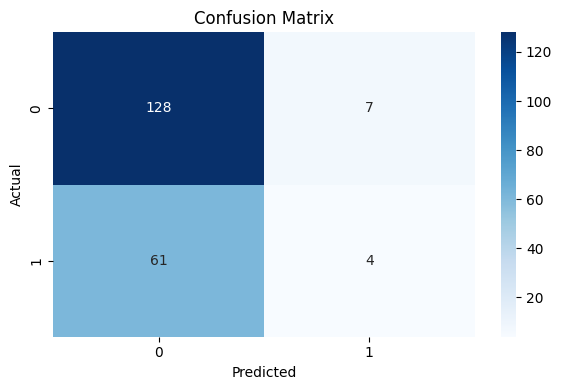

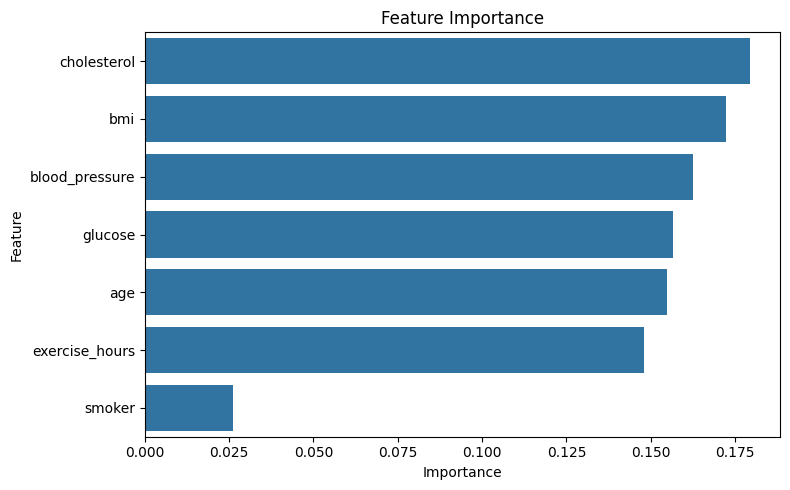

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Save the model
joblib.dump(clf, "patient_health_model.pkl")

# Predict on the test set
y_pred = clf.predict(X_test)

# Save evaluation metrics
report = classification_report(y_test, y_pred, output_dict=True)
with open("evaluation_metrics.json", "w") as f:
    json.dump(report, f, indent=4)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("confusion_matrix.png")

# Feature importance
importances = clf.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': feature_cols, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=feat_imp_df, x="Importance", y="Feature")
plt.title("Feature Importance")
plt.tight_layout()
plt.savefig("feature_importance_chart.png")

# Save predictions to recommendations.csv
pred_df = test_df.copy()
pred_df["predicted_disease_risk"] = y_pred
pred_df.to_csv("recommendations.csv", index=False)


Save model to TUWRD (placeholder)
save_to_tuwrd(model, model_metadata, "trained_model")

In [ ]:
print("\nData access and model training workflow complete!")
print("This notebook demonstrates FAIR principles by:")
print("1. Using persistent identifiers (PIDs) to access data")
print("2. Including comprehensive metadata with outputs")
print("3. Ensuring reproducibility of the experiment")
print("4. Following proper data citation practices")